In [1]:
from collections import OrderedDict
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
import pandas_profiling 

pd.set_option('max_columns', 500)

/Users/eyalkazin/envs/venv/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
%matplotlib inline

# [Data Description (kaggle)](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)  

Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.  
MSSubClass: The building class  
MSZoning: The general zoning classification  
LotFrontage: Linear feet of street connected to property  
LotArea: Lot size in square feet  
Street: Type of road access  
Alley: Type of alley access  
LotShape: General shape of property  
LandContour: Flatness of the property  
Utilities: Type of utilities available  
LotConfig: Lot configuration  
LandSlope: Slope of property  
Neighborhood: Physical locations within Ames city limits  
Condition1: Proximity to main road or railroad  
Condition2: Proximity to main road or railroad (if a second is present)  
BldgType: Type of dwelling  
HouseStyle: Style of dwelling  
OverallQual: Overall material and finish quality  
OverallCond: Overall condition rating  
YearBuilt: Original construction date   
YearRemodAdd: Remodel date   
RoofStyle: Type of roof   
RoofMatl: Roof material   
Exterior1st: Exterior covering on house   
Exterior2nd: Exterior covering on house (if more than one material)   
MasVnrType: Masonry veneer type  
MasVnrArea: Masonry veneer area in square feet    
ExterQual: Exterior material quality   
ExterCond: Present condition of the material on the exterior  
Foundation: Type of foundation  
BsmtQual: Height of the basement  
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area   
BsmtFinSF1: Type 1 finished square feet   
BsmtFinType2: Quality of second finished area (if present)  
BsmtFinSF2: Type 2 finished square feet   
BsmtUnfSF: Unfinished square feet of basement area   
TotalBsmtSF: Total square feet of basement area  
Heating: Type of heating  
HeatingQC: Heating quality and condition  
CentralAir: Central air conditioning   
Electrical: Electrical system    
1stFlrSF: First Floor square feet  
2ndFlrSF: Second floor square feet  
LowQualFinSF: Low quality finished square feet (all floors)  
GrLivArea: Above grade (ground) living area square feet   
BsmtFullBath: Basement full bathrooms   
BsmtHalfBath: Basement half bathrooms   
FullBath: Full bathrooms above grade   
HalfBath: Half baths above grade   
Bedroom: Number of bedrooms above basement level   
Kitchen: Number of kitchens  
KitchenQual: Kitchen quality   
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)   
Functional: Home functionality rating   
Fireplaces: Number of fireplaces  
FireplaceQu: Fireplace quality  
GarageType: Garage location   
GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
GarageQual: Garage quality  
GarageCond: Garage condition   
PavedDrive: Paved driveway   
WoodDeckSF: Wood deck area in square feet  
OpenPorchSF: Open porch area in square feet  
EnclosedPorch: Enclosed porch area in square feet  
3SsnPorch: Three season porch area in square feet  
ScreenPorch: Screen porch area in square feet    
PoolArea: Pool area in square feet   
PoolQC: Pool quality  
Fence: Fence quality  
MiscFeature: Miscellaneous feature not covered in other categories  
MiscVal: $Value of miscellaneous feature  
MoSold: Month Sold   
YrSold: Year Sold   
SaleType: Type of sale  
SaleCondition: Condition of sale   

# Data

In [4]:
path = "../data/"

df_train = pd.read_csv("{}train.csv".format(path)).set_index('Id')

print df_train.shape
df_train.head(6)

(1460, 80)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   
6           50       RL         85.0    14115   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
6          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   
6        Norm     1Fam     1.5Fin            5            5       1993   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
6           1995     Gable  CompShg     VinylSd     VinylSd       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   
6          0.0        TA        TA       Wood       Gd       TA           No   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   
6           GLQ         732          Unf           0         64          796   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866        

limit_output extension: Maximum message size of 10000 exceeded with 13108 characters

In [5]:
#pandas_profiling.ProfileReport(df_train)
pfr = pandas_profiling.ProfileReport(df_train)
pfr.to_file("./training_profile.html")

In [6]:
pfr.description_set.keys()

['table', 'variables', 'correlations', 'freq']

In [8]:
df_meta = pfr.description_set['variables'].copy() #.head(4)

df_meta.head(4)

,count,distinct_count,is_unique,memorysize,mode,n_infinite,n_missing,p_infinite,p_missing,p_unique,top,freq,type,25%,5%,50%,75%,95%,cv,histogram,iqr,kurtosis,mad,max,mean,min,mini_histogram,n_zeros,p_zeros,range,skewness,std,sum,variance
1stFlrSF,1460,753,False,11752,864,0,0,0,0,0,NaN,NaN,NUM,882,672.95,1087,1391.25,1831.25,0.332512,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",509.25,5.74584,300.576,4692,1162.63,334,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",0,0,4358,1.37676,386.588,1697435,149450
2ndFlrSF,1460,417,False,11752,0,0,0,0,0,0,NaN,NaN,NUM,0,0,0,728,1141.05,1.25803,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",728,-0.553464,396.478,2065,346.992,0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",829,0,2065,0.81303,436.528,506609,190557
3SsnPorch,1460,20,False,11752,0,0,0,0,0,0,NaN,NaN,NUM,0,0,0,0,0,8.59849,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",0,123.662,6.70708,508,3.40959,0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",1436,0,508,10.3043,29.3173,4978,859.506
Alley,91,3,False,11752,Grvl,0,1369,0,1,0,Grvl,50,CAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
df_meta['type'].value_counts()

CAT        43
NUM        36
ORDINAL     2
Name: type, dtype: int64

In [125]:
l_toCateroical = ['MSSubClass']

df_meta.loc[l_toCateroical, 'type'] = 'CAT'

In [16]:
df_meta[df_meta['is_unique'] == True]

,count,distinct_count,is_unique,memorysize,mode,n_infinite,n_missing,p_infinite,p_missing,p_unique,top,freq,type,25%,5%,50%,75%,95%,cv,histogram,iqr,kurtosis,mad,max,mean,min,mini_histogram,n_zeros,p_zeros,range,skewness,std,sum,variance
Id,1460,1460,True,11752,1,0,0,0,0,1,NaN,NaN,NUM,365.75,73.95,730.5,1095.25,1387.05,0.577153,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",729.5,-1.2,365,1460,730.5,1,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",0,0,1459,0,421.61,1066530,177755


In [19]:
df_meta[['n_infinite', 'n_missing', 'n_zeros']].sum()

n_infinite        0.0
n_missing      6965.0
n_zeros       17364.0
dtype: float64

In [9]:
pfr.description_set['variables']['type'].value_counts(dropna=False)

CAT    43
NUM    38
Name: type, dtype: int64

In [14]:
df_train.isnull().sum().sort_values(ascending=False) * 100. / df_train.shape[0]

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageType        5.547945
GarageCond        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageYrBlt       5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
RoofMatl          0.000000
Exterior1st       0.000000
RoofStyle         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
YearBuilt         0.000000
ExterCond         0.000000
Foundation        0.000000
YearRemodAdd      0.000000
SalePrice         0.000000
OverallCond       0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

In [126]:
df_train_meta = df_meta.copy() #pfr.description_set['variables'].copy()

In [35]:
 pfr.description_set.keys()

['table', 'variables', 'correlations', 'freq']

In [20]:
pfr.description_set['correlations'].keys() # ['pearson']

['spearman', 'pearson']

In [25]:
df_corrPearson = pfr.description_set['correlations']['pearson']
df_corrSpearman = pfr.description_set['correlations']['spearman']

df_corrPearson.head(4)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843


In [55]:
col_target = 'SalePrice'

df_corr_target = 100. * (df_corrPearson.loc[[col_target]].T).join(df_corrSpearman.loc[[col_target]].T, lsuffix='_pearson', rsuffix='_spearman')
df_corr_target.drop(col_target, axis=0, inplace=True)
df_corr_target['spearman_minus_pearson'] = df_corr_target[df_corr_target.columns[1]] - df_corr_target[df_corr_target.columns[0]]
df_corr_target.sort_values('spearman_minus_pearson', ascending=True, inplace=True)

print df_corr_target.shape
df_corr_target.head(10)

(37, 3)


,SalePrice_pearson,SalePrice_spearman,spearman_minus_pearson
EnclosedPorch,-12.857796,-21.839362,-8.981566
BsmtFinSF1,38.641981,30.187120,-8.454860
MasVnrArea,47.749305,42.130950,-5.618355
OverallCond,-7.785589,-12.932495,-5.146905
LowQualFinSF,-2.560613,-6.771915,-4.211302
MiscVal,-2.118958,-6.272700,-4.153742
PoolArea,9.240355,5.845300,-3.395055
1stFlrSF,60.585218,57.540784,-3.044435
BsmtUnfSF,21.447911,18.519663,-2.928248
KitchenAbvGr,-13.590737,-16.482575,-2.891838


/Users/eyalkazin/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


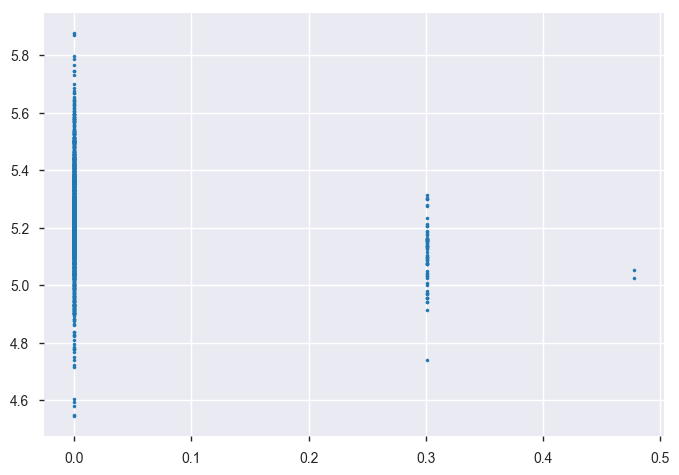

In [60]:
col = 'KitchenAbvGr'
df_train[col].isnull().sum()

plt.scatter(np.log10(df_train[col]), np.log10(df_train[col_target]),  s=5)

In [108]:
# missing 
# percentages of potentially missing data per column
col_sort = 'n_zeros' #'n_zeros'
(df_meta[['n_infinite', 'n_missing', 'n_zeros']] * 100. / df_train.shape[0]).sort_values(col_sort, ascending=False)

,n_infinite,n_missing,n_zeros
PoolArea,0,0,99.5205
3SsnPorch,0,0,98.3562
LowQualFinSF,0,0,98.2192
MiscVal,0,0,96.4384
BsmtHalfBath,0,0,94.3836
ScreenPorch,0,0,92.0548
BsmtFinSF2,0,0,88.5616
EnclosedPorch,0,0,85.7534
HalfBath,0,0,62.5342
MasVnrArea,0,0.547945,58.9726


In [111]:
missing_thresh = 0.15
l_missingHigh = df_meta[df_meta['n_missing'] > missing_thresh].index.tolist()

zeros_thresh = 0.15
l_zerosHigh = df_meta[df_meta['n_zeros'] > zeros_thresh].index.tolist()

# Exploring

## Numerical

In [68]:
df_train.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars'

In [70]:
l_ordinal = ['OverallCond', 'OverallQual']

df_meta.loc[l_ordinal, 'type'] = 'ORDINAL'

In [72]:
df_meta[df_meta['type'] == 'NUM']['distinct_count'].sort_values() #['HalfBath'] # michal

HalfBath            3
BsmtHalfBath        3
KitchenAbvGr        4
BsmtFullBath        4
FullBath            4
Fireplaces          4
YrSold              5
GarageCars          5
PoolArea            8
BedroomAbvGr        8
MoSold             12
TotRmsAbvGrd       12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        98
LotFrontage       111
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        328
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
Id               1460
Name: distinct_count, dtype: object

In [134]:
numerical_thresh = 10
bool_ = df_meta['type'] == 'NUM'
bool_ &= df_meta['distinct_count'] > numerical_thresh 

l_col_manyNum = df_meta[bool_].index.tolist()
l_col_manyNum = list(set(l_col_manyNum) - set(l_missingHigh) - set(l_zerosHigh))
l_col_manyNum.remove('Id')
l_col_manyNum.append('YrSold')

print len(l_col_manyNum)
#df_meta.loc[bool_, ['n_infinite', 'n_missing', 'n_zeros']] * 100. / df_train.shape[0]

9


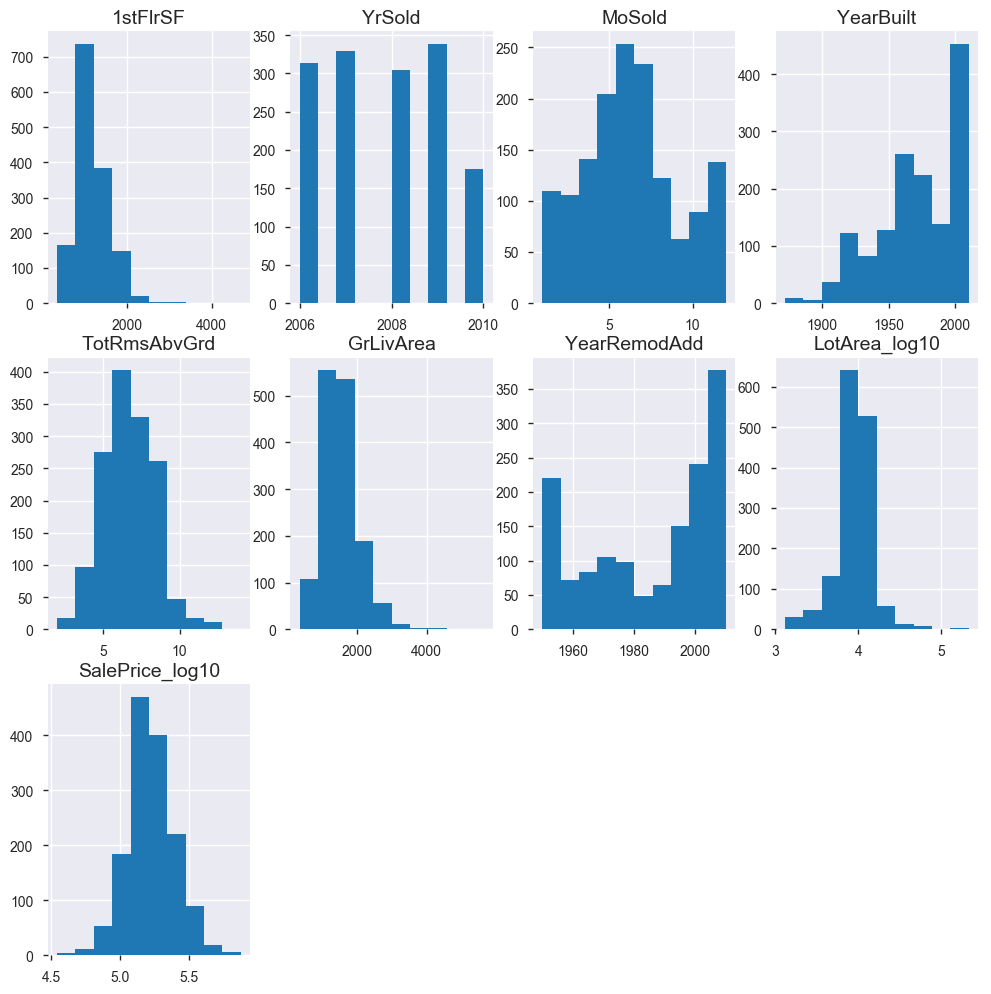

In [144]:
npanels = len(l_col_manyNum)

ncols = 4
nrows = npanels / ncols + np.sum( (npanels % ncols) != 0 )

width, height = 3, 4 
plt.figure(figsize=(width*ncols, height*nrows))

for panel, col in enumerate(l_col_manyNum):
    plt.subplot(nrows, ncols, panel + 1)
    values = df_train[col][df_train[col].notnull()]
    
    plt.hist(values)
    plt.title(col, fontsize=14)

In [129]:
l_col_manyNum

['1stFlrSF',
 'MoSold',
 'LotArea',
 'YearBuilt',
 'SalePrice',
 'TotRmsAbvGrd',
 'GrLivArea',
 'YearRemodAdd']

In [131]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [138]:
l_toLog = ['LotArea', 'SalePrice']


df_logs = df_train[[]]
for col in l_toLog:
    print col
    
    df_logs = df_logs.join(df_train[col].map(np.log10))
  
df_logs.columns = df_logs.columns.map(lambda x: "{}_log10".format(x))
print df_logs.shape
df_logs.head(4)

LotArea
SalePrice
(1460, 2)


,LotArea_log10,SalePrice_log10
Id,,
1,3.926857,5.319106
2,3.982271,5.258877
3,4.051153,5.349278
4,3.980003,5.146128


In [139]:
print df_train.shape
df_train = df_train.drop(l_toLog, axis=1).join(df_logs)

l_col_manyNum = list(set(l_col_manyNum) - set(l_toLog)) + df_logs.columns.tolist()

(1460, 80)


In [141]:
print df_train[l_col_manyNum].shape
df_train[l_col_manyNum].head(4)

(1460, 9)


,1stFlrSF,YrSold,MoSold,YearBuilt,TotRmsAbvGrd,GrLivArea,YearRemodAdd,LotArea_log10,SalePrice_log10
Id,,,,,,,,,
1,856,2008,2,2003,8,1710,2003,3.926857,5.319106
2,1262,2007,5,1976,6,1262,1976,3.982271,5.258877
3,920,2008,9,2001,6,1786,2002,4.051153,5.349278
4,961,2006,2,1915,7,1717,1970,3.980003,5.146128


In [62]:
l_cols_num = df_meta[].index.tolist()
l_cols_num.remove('Id')
df_explore = df_train[l_cols_num]

print df_explore.shape
df_explore.head(4)

(1460, 37)


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,3,706,0,1,0,150,0,0,2,548,2,2003.0,1710,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,208500,0,8,856,0,2003,2003,2008
2,1262,0,0,3,978,0,0,1,284,0,1,2,460,2,1976.0,1262,0,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,181500,0,6,1262,298,1976,1976,2007
3,920,866,0,3,486,0,1,0,434,0,1,2,608,2,2001.0,1786,1,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,223500,0,6,920,0,2001,2002,2008
4,961,756,0,3,216,0,1,0,540,272,1,1,642,3,1998.0,1717,0,1,9550,60.0,0,70,0.0,0,2,35,5,7,0,140000,0,7,756,0,1915,1970,2006


In [73]:
sr_missing = (df_explore.isnull().sum() * 100. / df_explore.shape[0]).sort_values(ascending=False)
sr_missing

LotFrontage        17.739726
GarageYrBlt         5.547945
MasVnrArea          0.547945
SalePrice_log10     0.000000
KitchenAbvGr        0.000000
GrLivArea           0.000000
GarageCars          0.000000
GarageArea          0.000000
FullBath            0.000000
Fireplaces          0.000000
EnclosedPorch       0.000000
BsmtUnfSF           0.000000
BsmtHalfBath        0.000000
BsmtFullBath        0.000000
BsmtFinSF2          0.000000
BsmtFinSF1          0.000000
BedroomAbvGr        0.000000
3SsnPorch           0.000000
2ndFlrSF            0.000000
HalfBath            0.000000
LotArea             0.000000
YrSold              0.000000
SalePrice           0.000000
YearRemodAdd        0.000000
YearBuilt           0.000000
WoodDeckSF          0.000000
TotalBsmtSF         0.000000
TotRmsAbvGrd        0.000000
ScreenPorch         0.000000
PoolArea            0.000000
LowQualFinSF        0.000000
OverallQual         0.000000
OverallCond         0.000000
OpenPorchSF         0.000000
MoSold        

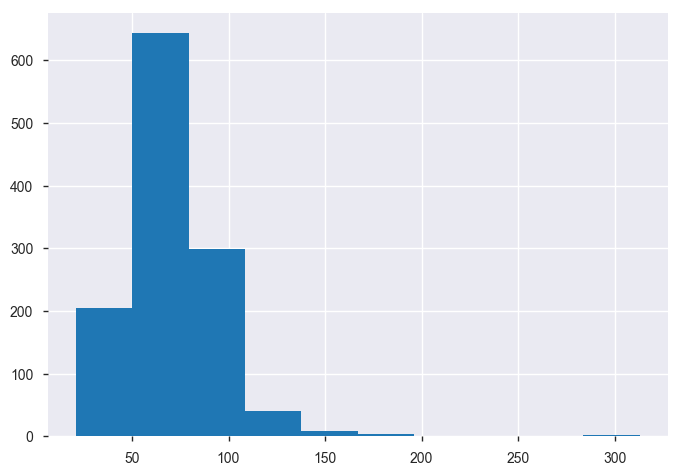

In [57]:
df_explore['LotFrontage'].hist()

In [71]:
df_explore.loc[:, 'SalePrice_log10'] = df_explore['SalePrice'].map(np.log10)

/Users/eyalkazin/envs/venv/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


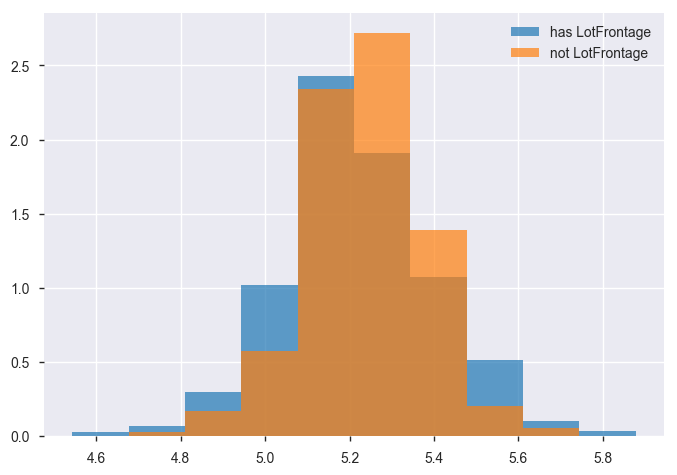

In [72]:
col = 'LotFrontage'
bool_ = df_explore['LotFrontage'].notnull()

hist_details = plt.hist(df_explore.loc[bool_, 'SalePrice_log10'], label="has {}".format(col), alpha=0.7, normed=True)
hist_details = plt.hist(df_explore.loc[~bool_, 'SalePrice_log10'], label="not {}".format(col), bins=hist_details[1], alpha=0.7, normed=True)
plt.legend()
pass

In [78]:
print df_explore.shape
df_explore.drop(sr_missing[sr_missing > 0.].index.tolist(), axis=1, inplace=True)
print df_explore.shape

(1460, 38)
(1460, 35)


/Users/eyalkazin/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
df_explore.isnull().sum().sum()

0

## Finding Outliers

### Focus on Most Important Features

In [225]:
# correlations to Target
print pfr.description_set['correlations'].keys() # ['spearman', 'pearson']
sr_pearson = pfr.description_set['correlations']['pearson']['SalePrice']

sr_pearson = sr_pearson.map(np.abs).sort_values(ascending=False)
sr_pearson

['spearman', 'pearson']


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

In [219]:
# ensemble trees

In [91]:
df_train_meta.loc[df_explore.columns]['distinct_count'][df_train_meta.loc[df_explore.columns]['distinct_count'].isnull()]

SalePrice_log10    NaN
Name: distinct_count, dtype: object

In [92]:
df_train_meta.loc[df_explore.columns]['distinct_count'].min()

3

In [80]:
df_explore.head(4)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LowQualFinSF,MSSubClass,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice_log10
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,3,706,0,1,0,150,0,0,2,548,2,1710,1,1,8450,0,60,0,2,61,5,7,0,208500,0,8,856,0,2003,2003,2008,5.319106
2,1262,0,0,3,978,0,0,1,284,0,1,2,460,2,1262,0,1,9600,0,20,0,5,0,8,6,0,181500,0,6,1262,298,1976,1976,2007,5.258877
3,920,866,0,3,486,0,1,0,434,0,1,2,608,2,1786,1,1,11250,0,60,0,9,42,5,7,0,223500,0,6,920,0,2001,2002,2008,5.349278
4,961,756,0,3,216,0,1,0,540,272,1,1,642,3,1717,0,1,9550,0,70,0,2,35,5,7,0,140000,0,7,756,0,1915,1970,2006,5.146128


In [96]:
from sklearn.ensemble import IsolationForest

In [ ]:
from sklearn.tree.ExtraTreeClassifier

In [192]:
help(tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_features : int, float, string or None, optional (default=None)
 |      The number of features to consider when looking for the best split:
 |  
 |          - If int, then consider `max_features` features at each split.
 |          - If float, then `max_features` is a percentage and
 |

limit_output extension: Maximum message size of 10000 exceeded with 19184 characters

In [191]:
help(tree.ExtraTreeClassifier)

Help on class ExtraTreeClassifier in module sklearn.tree.tree:

class ExtraTreeClassifier(DecisionTreeClassifier)
 |  An extremely randomized tree classifier.
 |  
 |  Extra-trees differ from classic decision trees in the way they are built.
 |  When looking for the best split to separate the samples of a node into two
 |  groups, random splits are drawn for each of the `max_features` randomly
 |  selected features and the best split among those is chosen. When
 |  `max_features` is set 1, this amounts to building a totally random
 |  decision tree.
 |  
 |  Warning: Extra-trees should only be used within ensemble methods.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  See also
 |  --------
 |  ExtraTreeRegressor, ExtraTreesClassifier, ExtraTreesRegressor
 |  
 |  References
 |  ----------
 |  
 |  .. [1] P. Geurts, D. Ernst., and L. Wehenkel, "Extremely randomized trees",
 |         Machine Learning, 63(1), 3-42, 2006.
 |  
 |  Method resolution order:
 |      ExtraTreeC

limit_output extension: Maximum message size of 10000 exceeded with 13139 characters

In [165]:
help(IsolationForest)

Help on class IsolationForest in module sklearn.ensemble.iforest:

class IsolationForest(sklearn.ensemble.bagging.BaseBagging)
 |  Isolation Forest Algorithm
 |  
 |  Return the anomaly score of each sample using the IsolationForest algorithm
 |  
 |  The IsolationForest 'isolates' observations by randomly selecting a feature
 |  and then randomly selecting a split value between the maximum and minimum
 |  values of the selected feature.
 |  
 |  Since recursive partitioning can be represented by a tree structure, the
 |  number of splittings required to isolate a sample is equivalent to the path
 |  length from the root node to the terminating node.
 |  
 |  This path length, averaged over a forest of such random trees, is a
 |  measure of normality and our decision function.
 |  
 |  Random partitioning produces noticeably shorter paths for anomalies.
 |  Hence, when a forest of random trees collectively produce shorter path
 |  lengths for particular samples, they are highly likely 

 1    1314
-1     146
dtype: int64


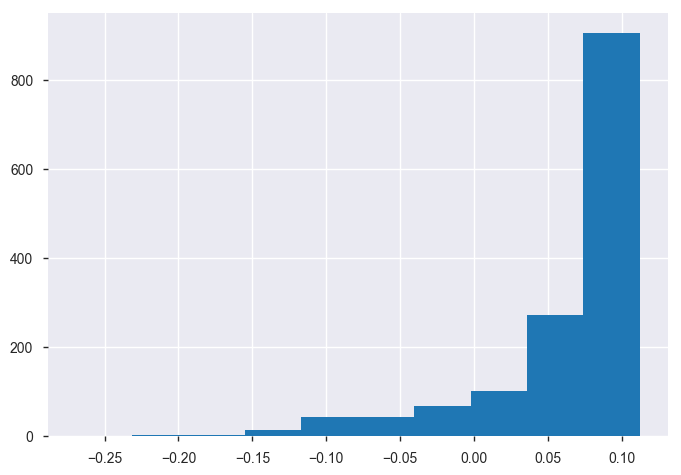

In [210]:
# main critisicm: `contamination` dictates the number of outliers. Requires eyeballing

clf = IsolationForest(verbose=0, contamination=0.1, n_estimators=100 ,max_samples='auto', random_state=4, n_jobs=-1)
#l_cols_drop = ['SalePrice_log10', 'SalePrice']
#clf.fit(df_explore.drop(l_cols_drop, axis=1))
#sr_inOutliers = pd.Series(clf.predict(df_explore.drop(l_cols_drop, axis=1)), index=df_explore.index )

l_cols_use = ['TotalBsmtSF', 'GrLivArea']
clf.fit(df_explore[l_cols_use])

sr_inOutliers = pd.Series(clf.predict(df_explore[l_cols_use]), index=df_explore.index )
sr_decisionResult = pd.Series(clf.decision_function(df_explore[l_cols_use]), index=df_explore.index )
print sr_inOutliers.value_counts(dropna=False)

sr_decisionResult.hist()

In [211]:
#sr_decisionResult0 = sr_decisionResult.copy()

sr_decisionResult0.equals(sr_decisionResult)

False

In [212]:
aa = clf.estimators_[0]

In [213]:
from sklearn import tree
import graphviz #  pip install graphviz

dot_data = tree.export_graphviz(aa, out_file=None, 
                                feature_names=l_cols_use, 
                                class_names=None, #iris.target_names,  
                                filled=True, rounded=True, 
                                special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("trial") 

'trial.pdf'

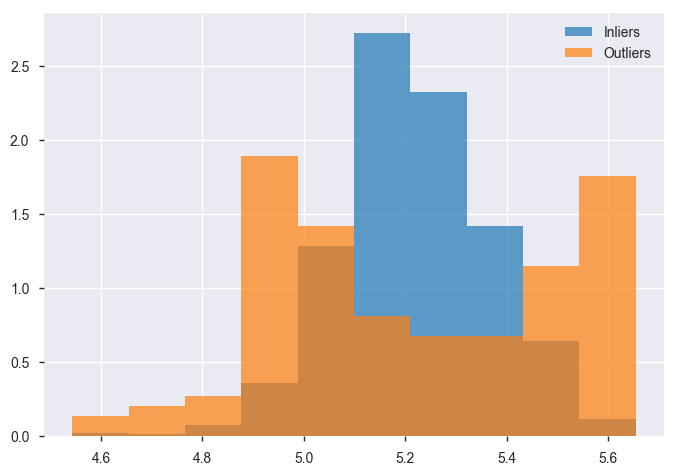

In [214]:
bool_ = sr_inOutliers == 1

hist_details = plt.hist(df_explore.loc[bool_, 'SalePrice_log10'], label="Inliers", alpha=0.7, normed=True)
hist_details = plt.hist(df_explore.loc[~bool_, 'SalePrice_log10'], label="Outliers", bins=hist_details[1], alpha=0.7, normed=True)
plt.legend()

In [215]:
df_train_meta.loc[df_explore.columns]['distinct_count'].sort_values()

HalfBath              3
BsmtHalfBath          3
KitchenAbvGr          4
FullBath              4
Fireplaces            4
BsmtFullBath          4
GarageCars            5
YrSold                5
PoolArea              8
BedroomAbvGr          8
OverallCond           9
OverallQual          10
MoSold               12
TotRmsAbvGrd         12
MSSubClass           15
3SsnPorch            20
MiscVal              21
LowQualFinSF         24
YearRemodAdd         61
ScreenPorch          76
YearBuilt           112
EnclosedPorch       120
BsmtFinSF2          144
OpenPorchSF         202
WoodDeckSF          274
2ndFlrSF            417
GarageArea          441
BsmtFinSF1          637
SalePrice           663
TotalBsmtSF         721
1stFlrSF            753
BsmtUnfSF           780
GrLivArea           861
LotArea            1073
SalePrice_log10     NaN
Name: distinct_count, dtype: object

In [216]:
['GrLivArea', 'BsmtUnfSF']

['GrLivArea', 'BsmtUnfSF']

/Users/eyalkazin/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


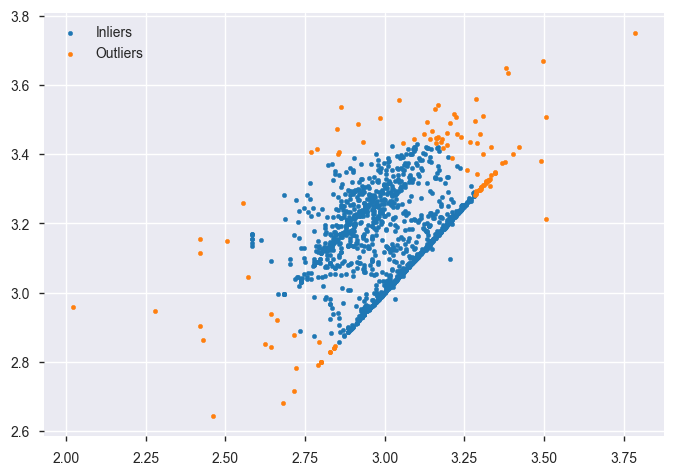

In [217]:
def plot_scatter(xx, yy, logX=False, logY=False, label=None):
    
    if logX:
        xx = np.log10(xx)
    if logY:
        yy = np.log10(yy)
        
    return plt.scatter(xx, yy, label=label, s=10)
    

colx, coly = l_cols_use #['TotalBsmtSF', 'GrLivArea']


bool_ = sr_inOutliers == 1

# --- inliers
xx = df_explore.loc[bool_, colx].copy()
yy = df_explore.loc[bool_, coly].copy()
plot_scatter(xx, yy, logX=True, logY=True, label='Inliers')

# --- outliers
xx = df_explore.loc[~bool_, colx].copy()
yy = df_explore.loc[~bool_, coly].copy()
plot_scatter(xx, yy, logX=True, logY=True, label='Outliers')

plt.legend()
pass